In [1]:
import numpy as np
from minepy import MINE

def print_stats(mine):
    print ("MIC", mine.mic())
    print ("MAS", mine.mas())
    print ("MEV", mine.mev())
    print ("MCN (eps=0)", mine.mcn(0))
    print ("MCN (eps=1-MIC)", mine.mcn_general())
    print ("GMIC", mine.gmic())
    print ("TIC", mine.tic())

x = np.linspace(0, 1, 1000)
y = np.sin(10 * np.pi * x) + x
mine = MINE(alpha=0.6, c=15, est="mic_approx")
mine.compute_score(x, y)

print("Without noise:")
print_stats(mine)

np.random.seed(0)
y +=np.random.uniform(-1, 1, x.shape[0]) # add some noise
mine.compute_score(x, y)

print("With noise:")
print_stats(mine)

Without noise:
MIC 1.0000000000000002
MAS 0.7260715743736172
MEV 1.0000000000000002
MCN (eps=0) 4.584962500721157
MCN (eps=1-MIC) 4.584962500721157
GMIC 0.7793602519010566
TIC 67.66122955319294
With noise:
MIC 0.5057166934173714
MAS 0.3653999042616394
MEV 0.5057166934173714
MCN (eps=0) 5.954196310386876
MCN (eps=1-MIC) 3.8073549220576037
GMIC 0.3594755013532375
TIC 28.749832695303994


<ipython-input-1-50a54214db6c>:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(x, y)
<ipython-input-1-50a54214db6c>:23: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(x, y)


<ipython-input-4-2c2feabed8ca>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(x, y)
<ipython-input-4-2c2feabed8ca>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(x, y)
<ipython-input-4-2c2feabed8ca>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this

<ipython-input-4-2c2feabed8ca>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mine.compute_score(x, y)


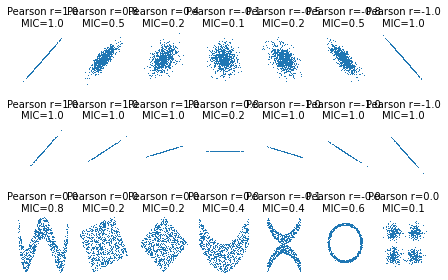

In [4]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from minepy import MINE


rs = np.random.RandomState(seed=0)

def mysubplot(x, y, numRows, numCols, plotNum,
              xlim=(-4, 4), ylim=(-4, 4)):

    r = np.around(np.corrcoef(x, y)[0, 1], 1)
    mine = MINE(alpha=0.6, c=15, est="mic_approx")
    mine.compute_score(x, y)
    mic = np.around(mine.mic(), 1)
    ax = plt.subplot(numRows, numCols, plotNum,
                     xlim=xlim, ylim=ylim)
    ax.set_title('Pearson r=%.1f\nMIC=%.1f' % (r, mic),fontsize=10)
    ax.set_frame_on(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.plot(x, y, ',')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

def rotation(xy, t):
    return np.dot(xy, [[np.cos(t), -np.sin(t)], [np.sin(t), np.cos(t)]])

def mvnormal(n=1000):
    cors = [1.0, 0.8, 0.4, 0.0, -0.4, -0.8, -1.0]
    for i, cor in enumerate(cors):
        cov = [[1, cor],[cor, 1]]
        xy = rs.multivariate_normal([0, 0], cov, n)
        mysubplot(xy[:, 0], xy[:, 1], 3, 7, i+1)

def rotnormal(n=1000):
    ts = [0, np.pi/12, np.pi/6, np.pi/4, np.pi/2-np.pi/6,
          np.pi/2-np.pi/12, np.pi/2]
    cov = [[1, 1],[1, 1]]
    xy = rs.multivariate_normal([0, 0], cov, n)
    for i, t in enumerate(ts):
        xy_r = rotation(xy, t)
        mysubplot(xy_r[:, 0], xy_r[:, 1], 3, 7, i+8)

def others(n=1000):
    x = rs.uniform(-1, 1, n)
    y = 4*(x**2-0.5)**2 + rs.uniform(-1, 1, n)/3
    mysubplot(x, y, 3, 7, 15, (-1, 1), (-1/3, 1+1/3))

    y = rs.uniform(-1, 1, n)
    xy = np.concatenate((x.reshape(-1, 1), y.reshape(-1, 1)), axis=1)
    xy = rotation(xy, -np.pi/8)
    lim = np.sqrt(2+np.sqrt(2)) / np.sqrt(2)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 16, (-lim, lim), (-lim, lim))

    xy = rotation(xy, -np.pi/8)
    lim = np.sqrt(2)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 17, (-lim, lim), (-lim, lim))

    y = 2*x**2 + rs.uniform(-1, 1, n)
    mysubplot(x, y, 3, 7, 18, (-1, 1), (-1, 3))

    y = (x**2 + rs.uniform(0, 0.5, n)) * \
        np.array([-1, 1])[rs.random_integers(0, 1, size=n)]
    mysubplot(x, y, 3, 7, 19, (-1.5, 1.5), (-1.5, 1.5))

    y = np.cos(x * np.pi) + rs.uniform(0, 1/8, n)
    x = np.sin(x * np.pi) + rs.uniform(0, 1/8, n)
    mysubplot(x, y, 3, 7, 20, (-1.5, 1.5), (-1.5, 1.5))

    xy1 = np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], int(n/4))
    xy2 = np.random.multivariate_normal([-3, 3], [[1, 0], [0, 1]], int(n/4))
    xy3 = np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], int(n/4))
    xy4 = np.random.multivariate_normal([3, -3], [[1, 0], [0, 1]], int(n/4))
    xy = np.concatenate((xy1, xy2, xy3, xy4), axis=0)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 21, (-7, 7), (-7, 7))

plt.figure(facecolor='white')
mvnormal(n=800)
rotnormal(n=200)
others(n=800)
plt.tight_layout()
plt.show()

In [10]:
import numpy as np
from minepy import pstats, cstats
import time

np.random.seed(0)

# build the X matrix, 8 variables, 320 samples
X = np.random.rand(8, 320)

# build the Y matrix, 4 variables, 320 samples
Y = np.random.rand(4, 320)

# compute pairwise statistics MIC_e and normalized TIC_e between samples in X,
# B=9, c=5
mic_p, tic_p =  pstats(X, alpha=9, c=5, est="mic_e")

# compute statistics between each pair of samples in X and Y
mic_c, tic_c =  cstats(X, Y, alpha=9, c=5, est="mic_e")

print("normalized TIC_e (X):")
print (tic_p)
print("MIC_e (X vs. Y):")
print (mic_c)

normalized TIC_e (X):
[0.01517556 0.00859132 0.00562575 0.01082706 0.01367201 0.0196697
 0.00947777 0.01273158 0.011291   0.01455822 0.0072817  0.01187837
 0.01595135 0.00902464 0.00974791 0.00952264 0.01806944 0.01064587
 0.00808622 0.01075486 0.00943122 0.01116569 0.01380142 0.01590193
 0.02159243 0.01450488 0.01347701 0.01036625]
MIC_e (X vs. Y):
[[0.0175473  0.01102385 0.01489008 0.02957048]
 [0.01294067 0.02682975 0.02743612 0.02224291]
 [0.01613576 0.0175808  0.01633154 0.02633199]
 [0.02090252 0.01680651 0.01735732 0.02186021]
 [0.01350926 0.01002233 0.02128154 0.02036634]
 [0.01459962 0.020248   0.0319421  0.01782455]
 [0.01186273 0.0291112  0.01577821 0.01970322]
 [0.012531   0.02071883 0.01536824 0.03312674]]


<ipython-input-10-0f955702a4e2>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mic_p, tic_p =  pstats(X, alpha=9, c=5, est="mic_e")
<ipython-input-10-0f955702a4e2>:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mic_c, tic_c =  cstats(X, Y, alpha=9, c=5, est="mic_e")
